# <center>Application of AI Models for Credit Risk Assessment in P2P Lending</center>

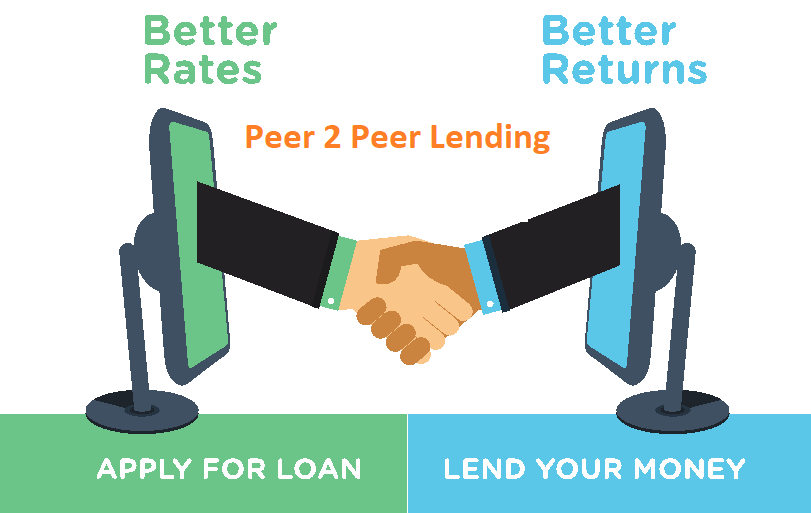

<a id='Table_Contents'></a><br>
### Table of Contents
1. [Introduction](#intro)
 * Problem Statement
 * Project Objective
 * Project Question
 * Project Hypothesis
 
 
2. [Data](#imports_data)
 * Data Source
 * Dataset Description
 * Importing Packages
 * Dataset Inspection
 * Data preprocessing
 
 
3. [Exploratory Data Analysis](#EDA)
 * Descriptive Analysis 
 * Customer Demographics
 * Loan History and Behaviour
 * Loan servicing behaviour
 

4. [Model Building](#model)
 * Encoding Data
 * Logistic Regression
 * OLS
 * LinearDiscriminantAnalysis
 * Support Vector Machine (SVM)
 * Random Forest Classifier
 * XGBoost
 * LightGBM
 
 
5. [Model Evaluation](#evaluate)

6. [Conclusion](#conclude)

7. [Recommendation](#recommend)

8. [Reference](#reference)



<a id='intro'></a><br>
## 1. Introduction
[Back to Table of Contents](#Table_Contents)

### Problem Statement
Because bank lending is the most common source of external funding for many Small and Medium Enterprises and entrepreneurs, there is a growing demand for loans to people and SMEs. People and businesses require loans for a variety of reasons, including cash emergencies, debt consolidation, and the start-up and/or expansion of a company. A substantial number of individuals and organizations in Nigeria are unable to obtain credit, and SMEs face similar challenges due to issues such as a lack of collateral, poor record-keeping, poor creditworthiness, and weak project proposals. For this reason, peer-to-peer lending platforms, which allow people and businesses to borrow and lend money without the involvement of a traditional financial institution have evolved over time.

However, P2P lending platforms are linked to high credit risks since borrowers have a high tendency to default, either by not repaying disbursed loans on time or at all. For P2PL organizations, managing loan default risk is crucial and it is advisable for them to deploy models that can accurately predict loan default tendencies to help mitigate these risks.

Building algorithms that identify specific consumer categories and allocate weights based on risk levels, in my opinion, would assist an investor in lessening the risks associated with P2P lending. This research will analyze how Artificial Intelligence (AI) models can help Financial Technology Institutions in Nigeria improve the P2P lending process by reducing the chances of borrowers not meeting their repayment commitments when they are due.

### Project Objective
The overall aim of this project is to create a predictive loan risk model that will guide P2P lending platform investors to make informed decisions about borrowers with high default risks based on certain characteristics.

### Project Questions
The major questions stated below should represent the bulk of this research's primary findings to meet the research's main goals and objectives. Among them are:

1. What are the key contributing factors that increase a borrower’s likelihood of defaulting on P2P lending platforms?
2. Is the risk of loan default larger for first-time loans or repeat loans?
3. How accurately is the model performing to predict the probability of borrowers that will default?

### Project Hypothesis
Null hypothesis: There are no statistically significant factors that contributes to increase a borrower’s likelihood of defaulting on P2P lending platforms in Nigeria

Null hypothesis: The probability of a borrower defaulting when taking a first-time loan is higher than when he/she takes subsequent loans.


<a id='imports_data'></a><br>
## 2. Data
[Back to Table of Contents](#Table_Contents)

### Data Source
Data used is a secondary loan history data from a P2P lending organisation provided by Data Science Nigeria (DSN) and hosted on the Zindi platform (Odegua 2020). The database contains information on consumer demographics, loan history, payment information, and if the customer defaulted based on several factors.

### Data Description
There are 3 different datasets from the data source. They include:<br>

a)	Demographic data <br>
This contains preliminary information about the customers that used the P2P lending services. Features include the customer identification, date of birth of the customer, type of primary bank account, location (longitude and latitude), name of the bank clients uses, location of the bank branch used by the clients, type of employment that customer has, highest level of education. The data is made up of 9 features and 4346 samples.

b)	Loan Performance data <br>
This includes the repeat loan that the consumer has taken, the performance of which we must predict. In essence, we must forecast whether this loan would default based on the customer's demographics and history of lending. Feature information include the customer’s id, The id associated with the particular loan, The number of the loan a customer has collected so far, Date that loan was approved, Date that loan application was created, Loan value taken, Total repayment required to settle the loan. This is the capital loan value disbursed plus interest and fees, Term of loan, customer that referred a particular person, whether the loan was settled on time or not. This is represented by good for “settled on time” and bad for “did not settle loan on time”. The data contains 10 features and 4368 samples.

c)	Previous loans data <br>
This dataset contains all information about previous loans that the customer had prior to the loan as well as the information on pay-back mechanism.  Features include loan information in the performance data with additional information on the first payment due date and the actual date that he/she paid the first payment as defined previously. The data is made up of 12 features and 18183 samples.

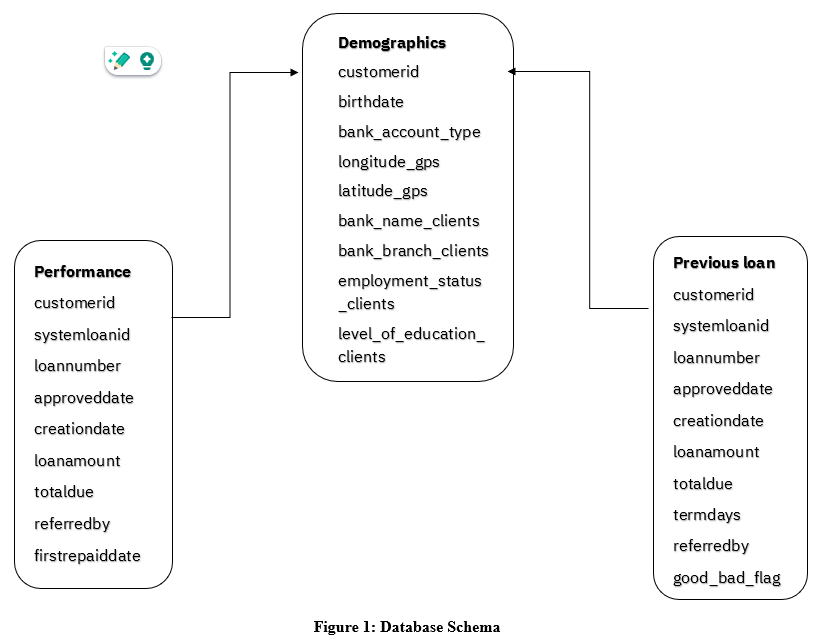

### Import Packages

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
from datetime import date

#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold




sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('merged.csv')

### Dataset Inspection

In [3]:
data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,...,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,good_bad_flag,closeddate,firstduedate,firstrepaiddate
0,8a1088a0484472eb01484669e3ce4e0b,301960241.0,1.0,2017-07-02 19:19:01,2017-07-02 18:17:53,10000.0,11500.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-24 20:50:43,2017-07-18,2017-07-24 20:40:34
1,8a1088a0484472eb01484669e3ce4e0b,301999397.0,2.0,2017-07-27 19:44:08,2017-07-27 18:44:00,10000.0,11500.0,15.0,NaN,1989-11-09,...,3.351667,6.657019,GT Bank,OJUELEGBA,Permanent,Primary,Bad,NaN,NaN,NaN
2,8a1a1e7e4f707f8b014f797718316cad,301620412.0,1.0,2016-05-13 15:29:37,2016-05-13 14:29:31,10000.0,13000.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-15 00:03:33,2016-06-13,2016-06-14 10:41:13
3,8a1a1e7e4f707f8b014f797718316cad,301632940.0,2.0,2016-06-15 11:22:38,2016-06-15 10:22:32,10000.0,13000.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-15 13:59:02,2016-07-15,2016-07-15 13:43:58
4,8a1a1e7e4f707f8b014f797718316cad,301916386.0,3.0,2017-05-23 14:21:42,2017-05-23 13:20:30,20000.0,24500.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-21 21:58:00,2017-06-22,2017-06-21 21:47:51


In [4]:
data.info() #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23628 entries, 0 to 23627
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  23628 non-null  object 
 1   systemloanid                22559 non-null  float64
 2   loannumber                  22559 non-null  float64
 3   approveddate                22559 non-null  object 
 4   creationdate                22559 non-null  object 
 5   loanamount                  22559 non-null  float64
 6   totaldue                    22559 non-null  float64
 7   termdays                    22559 non-null  float64
 8   referredby                  1615 non-null   object 
 9   birthdate                   4346 non-null   object 
 10  bank_account_type           4346 non-null   object 
 11  longitude_gps               4346 non-null   float64
 12  latitude_gps                4346 non-null   float64
 13  bank_name_clients           434

In [5]:
data.isna().sum() #checking for missing values

customerid                        0
systemloanid                   1069
loannumber                     1069
approveddate                   1069
creationdate                   1069
loanamount                     1069
totaldue                       1069
termdays                       1069
referredby                    22013
birthdate                     19282
bank_account_type             19282
longitude_gps                 19282
latitude_gps                  19282
bank_name_clients             19282
bank_branch_clients           23577
employment_status_clients     19930
level_of_education_clients    23041
good_bad_flag                 19252
closeddate                     5445
firstduedate                   5445
firstrepaiddate                5445
dtype: int64

In [6]:
data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients', 'good_bad_flag', 'closeddate',
       'firstduedate', 'firstrepaiddate'],
      dtype='object')

### Data Preprocessing

Converting the date columns to datetime object

In [7]:
dates = ['approveddate', 'creationdate', 'birthdate', 'closeddate', 'firstduedate', 'firstrepaiddate']

In [8]:
for date in dates:
    data[date] = pd.to_datetime(data[date])

In [9]:
data['closeddate']

0       2017-07-24 20:50:43
1                       NaT
2       2016-06-15 00:03:33
3       2016-07-15 13:59:02
4       2017-06-21 21:58:00
                ...        
23623   2017-07-05 20:22:42
23624                   NaT
23625                   NaT
23626                   NaT
23627                   NaT
Name: closeddate, Length: 23628, dtype: datetime64[ns]

# Feature Engineering

Extracting year, month, day, hour, minute and seconds features from the dates

In [10]:
drop_data = data.drop(np.where(data['systemloanid'].isnull())[0], axis = 0)

In [11]:
# interest feature

drop_data['interest'] = drop_data['totaldue'] - drop_data['loanamount']

In [12]:
#interest rate
drop_data['interest_rate'] = round(drop_data['interest'] / (drop_data['loanamount'] * (drop_data['termdays']/365)), 2) #* 100

In [13]:
col_to_fill = ['birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps', 'bank_name_clients', 
               'bank_branch_clients', 'employment_status_clients', 'level_of_education_clients', ]

In [14]:
for col in col_to_fill:
    drop_data[col_to_fill] = drop_data[col_to_fill].fillna(method = 'bfill')

In [15]:
for rows in drop_data['termdays']:
    drop_data['test'] = drop_data['approveddate'] + timedelta(days=rows)

In [16]:
drop_data['test']

0       2017-08-01 19:19:01
1       2017-08-26 19:44:08
2       2016-06-12 15:29:37
3       2016-07-15 11:22:38
4       2017-06-22 14:21:42
                ...        
23620   2017-06-19 09:52:31
23621   2017-07-25 15:51:04
23622   2017-08-22 18:39:10
23623   2017-07-06 11:04:47
23624   2017-08-05 19:42:39
Name: test, Length: 22559, dtype: datetime64[ns]

In [17]:
drop_data['closeddate'] = np.where(drop_data['closeddate'].isnull(),drop_data['test'], drop_data['closeddate'])

In [18]:
drop_data['firstduedate'] = np.where(drop_data['firstduedate'].isnull(),drop_data['test'], drop_data['firstduedate'])

In [19]:
drop_data['firstrepaiddate'] = np.where(drop_data['firstrepaiddate'].isnull(),drop_data['test'], 
                                        drop_data['firstrepaiddate'])

In [20]:
drop_data['approved_year'] = drop_data['approveddate'].dt.year
drop_data['approved_Month'] = drop_data['approveddate'].dt.month
drop_data['approved_day'] = drop_data['approveddate'].dt.day
drop_data['approved_hour'] = drop_data['approveddate'].dt.hour
drop_data['approved_minute'] = drop_data['approveddate'].dt.minute
drop_data['approved_second'] = drop_data['approveddate'].dt.second

In [21]:
drop_data['creation_year'] = drop_data['creationdate'].dt.year
drop_data['creation_Month'] = drop_data['creationdate'].dt.month
drop_data['creation_day'] = drop_data['creationdate'].dt.day
drop_data['creation_hour'] = drop_data['creationdate'].dt.hour
drop_data['creation_minute'] = drop_data['creationdate'].dt.minute
drop_data['creation_second'] = drop_data['creationdate'].dt.second

In [22]:
drop_data['closed_year'] = drop_data['closeddate'].dt.year
drop_data['closed_Month'] = drop_data['closeddate'].dt.month
drop_data['closed_day'] = drop_data['closeddate'].dt.day
drop_data['closed_hour'] = drop_data['closeddate'].dt.hour
drop_data['closed_minute'] = drop_data['closeddate'].dt.minute
drop_data['closed_second'] = drop_data['closeddate'].dt.second

In [23]:
drop_data['firstdue_year'] = drop_data['firstduedate'].dt.year
drop_data['firstdue_Month'] = drop_data['firstduedate'].dt.month
drop_data['firstdue_day'] = drop_data['firstduedate'].dt.day
drop_data['firstdue_hour'] = drop_data['firstduedate'].dt.hour
drop_data['firstdue_minute'] = drop_data['firstduedate'].dt.minute
drop_data['firstdue_second'] = drop_data['firstduedate'].dt.second

In [24]:
drop_data['firstrepaid_year'] = drop_data['firstrepaiddate'].dt.year#.astype(int)
drop_data['firstrepaid_Month'] = drop_data['firstrepaiddate'].dt.month
drop_data['firstrepaid_day'] = drop_data['firstrepaiddate'].dt.day
drop_data['firstrepaid_hour'] = drop_data['firstrepaiddate'].dt.hour
drop_data['firstrepaid_minute'] = drop_data['firstrepaiddate'].dt.minute
drop_data['firstrepaid_second'] = drop_data['firstrepaiddate'].dt.second

In [25]:
idx = drop_data[drop_data['employment_status_clients'].isnull()].index
idx

Int64Index([23614, 23615, 23616, 23617, 23618, 23619, 23620, 23621, 23622,
            23623, 23624],
           dtype='int64')

In [26]:
drop_data = drop_data.drop(idx)

In [27]:
#response time
drop_data['response_time'] = (drop_data['approveddate'] - drop_data['creationdate']).astype('timedelta64[h]')

In [28]:
drop_data['proposed_paytime'] = (drop_data['firstduedate'] - drop_data['approveddate']).astype('timedelta64[D]')

In [29]:
drop_data['first_paytime'] = (drop_data['firstrepaiddate'] - drop_data['approveddate']).astype('timedelta64[D]')

In [30]:
drop_data['final_paytime'] = (drop_data['closeddate'] - drop_data['approveddate']).astype('timedelta64[D]')

In [31]:
drop_data['level_of_education_clients'] = drop_data['level_of_education_clients'].fillna(
    drop_data['level_of_education_clients'].mode()[0])

In [32]:
col_to_drop = ['referredby', 'bank_branch_clients', 'good_bad_flag', 'test']

In [33]:
drop_data = drop_data.drop(col_to_drop, axis = 1)

In [34]:
drop_data['first_time_returning'] = np.where(drop_data['loannumber'] == 1, 'First-time', 'Returning')

In [35]:
drop_data['target'] = np.where(drop_data['final_paytime'] > drop_data['termdays'], 'Bad','Good')

In [36]:
drop_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,birthdate,bank_account_type,...,firstrepaid_day,firstrepaid_hour,firstrepaid_minute,firstrepaid_second,response_time,proposed_paytime,first_paytime,final_paytime,first_time_returning,target
0,8a1088a0484472eb01484669e3ce4e0b,301960241.0,1.0,2017-07-02 19:19:01,2017-07-02 18:17:53,10000.0,11500.0,15.0,1989-11-09,Savings,...,24,20,40,34,1.0,15.0,22.0,22.0,First-time,Bad
1,8a1088a0484472eb01484669e3ce4e0b,301999397.0,2.0,2017-07-27 19:44:08,2017-07-27 18:44:00,10000.0,11500.0,15.0,1989-11-09,Savings,...,26,19,44,8,1.0,30.0,30.0,30.0,Returning,Bad
2,8a1a1e7e4f707f8b014f797718316cad,301620412.0,1.0,2016-05-13 15:29:37,2016-05-13 14:29:31,10000.0,13000.0,30.0,1979-10-18,Other,...,14,10,41,13,1.0,30.0,31.0,32.0,First-time,Bad
3,8a1a1e7e4f707f8b014f797718316cad,301632940.0,2.0,2016-06-15 11:22:38,2016-06-15 10:22:32,10000.0,13000.0,30.0,1979-10-18,Other,...,15,13,43,58,1.0,29.0,30.0,30.0,Returning,Good
4,8a1a1e7e4f707f8b014f797718316cad,301916386.0,3.0,2017-05-23 14:21:42,2017-05-23 13:20:30,20000.0,24500.0,30.0,1979-10-18,Other,...,21,21,47,51,1.0,29.0,29.0,29.0,Returning,Good


In [37]:
drop_data.isnull().sum()

customerid                    0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
interest                      0
interest_rate                 0
approved_year                 0
approved_Month                0
approved_day                  0
approved_hour                 0
approved_minute               0
approved_second               0
creation_year                 0
creation_Month                0
creation_day                  0
creation_hour                 0
creation_minute               0
creation

<a id='EDA'></a><br>
## 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)

### Descriptive Analysis

In [79]:
numeric_features = ['loannumber', 'loanamount', 'totaldue', 'termdays', 'interest', 'interest_rate', 'response_time',
                   'proposed_paytime','first_paytime', 'final_paytime', 'age']

In [83]:
drop_data[numeric_features].describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
loannumber,4.380078,3.354294,1.0,2.00,3.00,6.00,27.00
loanamount,16755.011531,9628.926377,3000.0,10000.00,10000.00,20000.00,60000.00
totaldue,19900.049876,10780.727309,3450.0,12250.00,13000.00,24500.00,68100.00
termdays,27.192656,11.106949,15.0,15.00,30.00,30.00,90.00
interest,3145.038345,1541.904931,0.0,1500.00,3000.00,4000.00,9000.00
interest_rate,2.949165,0.878581,0.0,2.31,3.65,3.65,3.65
response_time,1.050115,0.959678,1.0,1.00,1.00,1.00,42.00
proposed_paytime,25.621031,6.784751,13.0,16.00,29.00,30.00,34.00
first_paytime,24.018893,11.263387,0.0,15.00,28.00,30.00,380.00
final_paytime,24.664848,12.183260,0.0,15.00,28.00,30.00,380.00


Descriptive statistics give us an overview of how distributed our variables are. Based on the results, we can make the following conclusions about each of the variables:

1.	A customer can borrow at least 3000. The highest amount of money to be loaned out is 60,000 with an average value of approximately 16,500.
2.	Age range falls between 20 – 55 years with an average age of 32 years.
3.	The time duration given by the organization to pay back loan spans from 15 days to a maximum of approximately 3 months (90 days).
4.	When a customer applies for loans, it takes an average of a little over one hour to approve loan from the time application was created.
5.	Interest rate seems fair as the highest rate is on 3.65% while the lowest rate is 0%
6.	The average time it takes a customer to pay back loan is approximately 25 days. Despite the time duration given by the organization to pay back loans, customers response to this term is not encouraging as there are cases where customer exceeded the maximum time duration of 3 months. (Max = 381 days).


### Distribution Plots

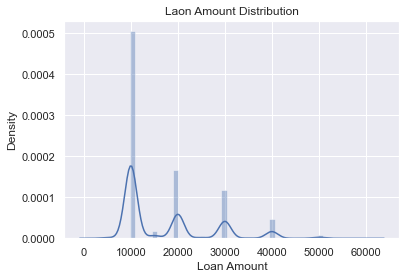

In [39]:
sns.distplot(drop_data['loanamount'])
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.title('Laon Amount Distribution')
plt.show()

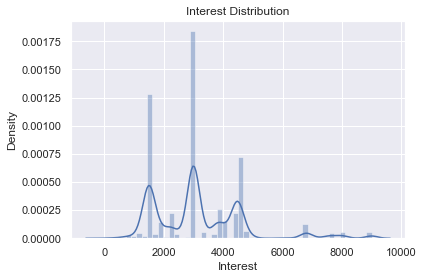

In [40]:
sns.distplot(drop_data['interest'])
plt.xlabel('Interest')
plt.ylabel('Density')
plt.title('Interest Distribution')
plt.show()

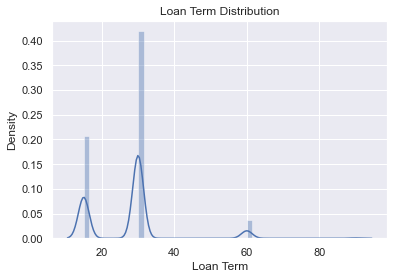

In [41]:
sns.distplot(drop_data['termdays'])
plt.xlabel('Loan Term')
plt.ylabel('Density')
plt.title('Loan Term Distribution')
plt.show()

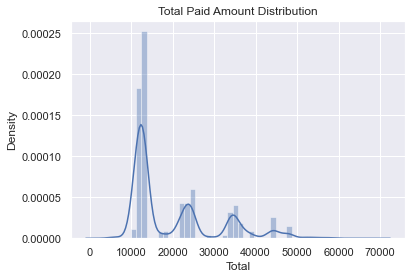

In [42]:
sns.distplot(drop_data['totaldue'])
plt.xlabel('Total')
plt.ylabel('Density')
plt.title('Total Paid Amount Distribution')
plt.show()

In [43]:
drop_data['age'] = drop_data.apply(lambda x: x['creationdate'].year - x['birthdate'].year - ((x['creationdate'].month, x['creationdate'].day) < (x['birthdate'].month, x['birthdate'].day)), axis = 1)

In [44]:
drop_data['age']

0        27
1        27
2        36
3        36
4        37
         ..
23609    29
23610    29
23611    29
23612    29
23613    29
Name: age, Length: 22548, dtype: int64

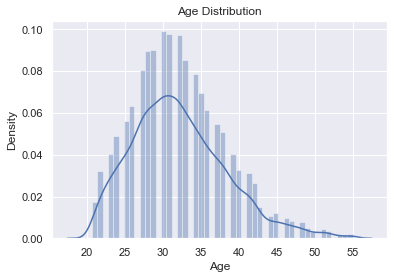

In [45]:
sns.distplot(drop_data['age'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

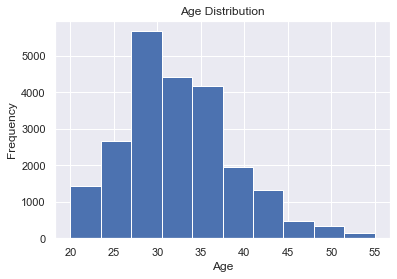

In [46]:
plt.hist(x=drop_data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

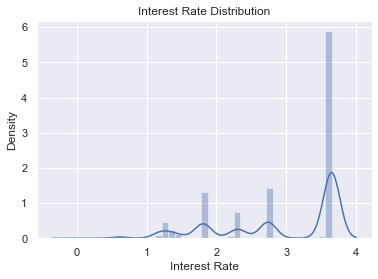

In [47]:
sns.distplot(drop_data['interest_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Interest Rate Distribution')
plt.show()

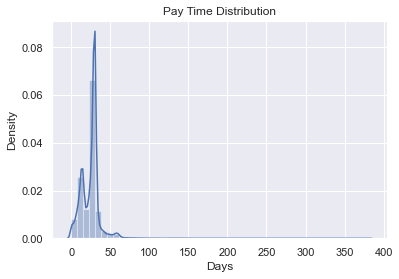

In [48]:
sns.distplot(drop_data['final_paytime'])
plt.xlabel('Days')
plt.ylabel('Density')
plt.title('Pay Time Distribution')
plt.show()

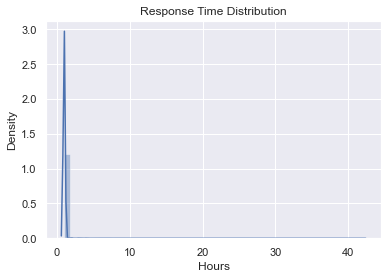

In [49]:
sns.distplot(drop_data['response_time'])
plt.xlabel('Hours')
plt.ylabel('Density')
plt.title('Response Time Distribution')
plt.show()

In [50]:
drop_data.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'birthdate',
       'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'closeddate', 'firstduedate',
       'firstrepaiddate', 'interest', 'interest_rate', 'approved_year',
       'approved_Month', 'approved_day', 'approved_hour', 'approved_minute',
       'approved_second', 'creation_year', 'creation_Month', 'creation_day',
       'creation_hour', 'creation_minute', 'creation_second', 'closed_year',
       'closed_Month', 'closed_day', 'closed_hour', 'closed_minute',
       'closed_second', 'firstdue_year', 'firstdue_Month', 'firstdue_day',
       'firstdue_hour', 'firstdue_minute', 'firstdue_second',
       'firstrepaid_year', 'firstrepaid_Month', 'firstrepaid_day',
       'firstrepaid_hour', 'firstrepaid_minute', 'firstrepaid_second',
       'response_time', 'pr

### Customer Demographics

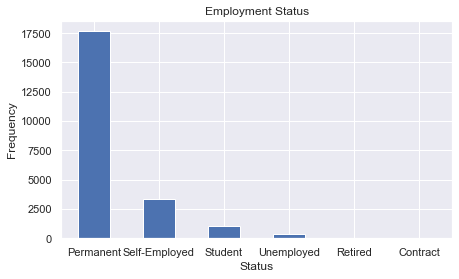

In [51]:
plt.figure(figsize=(7,4))
drop_data['employment_status_clients'].value_counts().plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Employment Status')
plt.xticks(rotation=0)
plt.show()

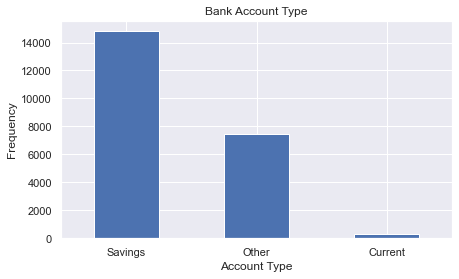

In [52]:
plt.figure(figsize=(7,4))
drop_data['bank_account_type'].value_counts().plot(kind='bar')
plt.xlabel('Account Type')
plt.ylabel('Frequency')
plt.title('Bank Account Type')
plt.xticks(rotation=0)
plt.show()

From our data, most of the clients are graduates who have a permanent source of income, probably working in a corporate organization and have a savings account. Very few clients are contractual employees, attained at least a primary level of education and are retired.

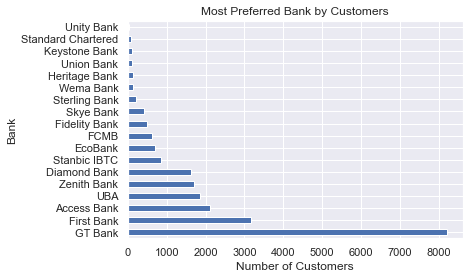

In [53]:
# plt.figure(figsize=(7,4))
drop_data['bank_name_clients'].value_counts().plot(kind='barh')
plt.xlabel('Number of Customers')
plt.ylabel('Bank')
plt.title('Most Preferred Bank by Customers')
plt.xticks(rotation=0)
plt.show()

GT Bank, First bank and Access bank are the top 3 most prefereed bank among people that seek loan in this P2P lending platform while Unity and Standard Chartered bank are the least preferred bank.

### Loan History and behaviour

From our data, there was a rise in borrowing trend in 2017 compared to the previous year of 2016. Taking a deeper dive to know the share of these loans among customers in terms of educational level and employment status, we could make the following conclusions:

<AxesSubplot:xlabel='approved_year'>

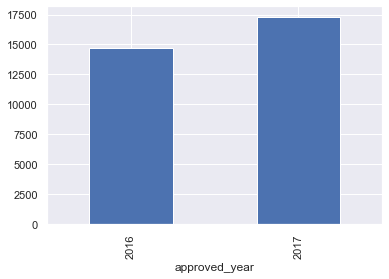

In [54]:
drop_data.groupby('approved_year').mean()['loanamount'].plot(kind='bar')

Among the six categories of employment status, it is striking that about 75% of customers that have a permanent source of income borrow less than 30,000. This could be attributed to the fact that they already have a source of income. This category also has the highest amount of loan being borrowed. The unemployed category also exhibited the same trend as the permanently employed customers. Reasons could be persons in this category might not be enlightened about the loan scheme. The customers in the contract, retired, self-employed and student category also share similar characteristics as regards their borrowing behaviour.

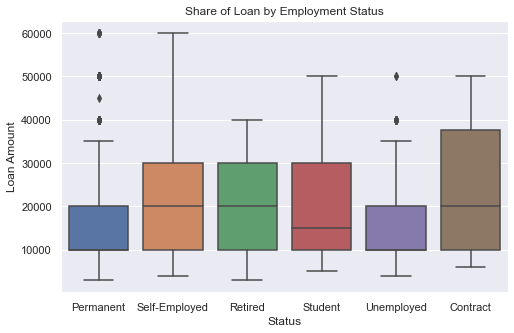

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x='employment_status_clients',
    y='loanamount',
    data=drop_data)
plt.xlabel('Status')
plt.ylabel('Loan Amount')
plt.title('Share of Loan by Employment Status')
plt.show()

Judging through the perspectives of educational level, it is shown in fig 10that all four categories of customers share the similar characteristics. Although, some difference is seen in highest amount of funds borrowed. Customers in the post graduate and graduate level tend to borrow higher amounts compared to the secondary and primary categories. Customers in the primary level borrow the least number of funds.

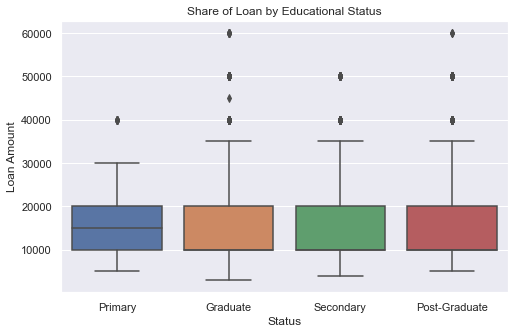

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x='level_of_education_clients',
    y='loanamount',
    data=drop_data)
plt.xlabel('Status')
plt.ylabel('Loan Amount')
plt.title('Share of Loan by Educational Status')
plt.show()

### Loan Servicing Behaviour

Customers in the contract, student and retired category showed strong commitment to servicing their funds. These categories make sure they pay their debt before the maximum 3 months threshold set by the organization. However, other categories aside these default in paying their debs especially those ones that have a permanent job. This might be as a result of high interest rate from accrued high amount of money borrowed.

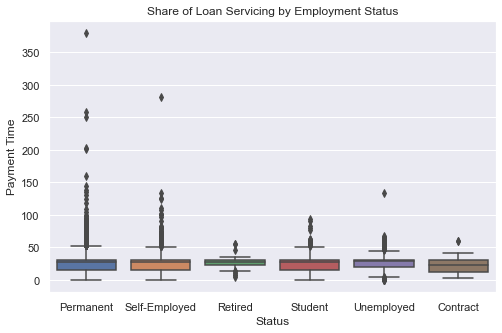

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x='employment_status_clients',
    y='final_paytime',
    data=drop_data)
plt.xlabel('Status')
plt.ylabel('Payment Time')
plt.title('Share of Loan Servicing by Employment Status')
plt.show()

From the figure below, we can see that all categories of customers in this space does not comply with the stipulated time for paying of their debt especially customers who are graduates. 

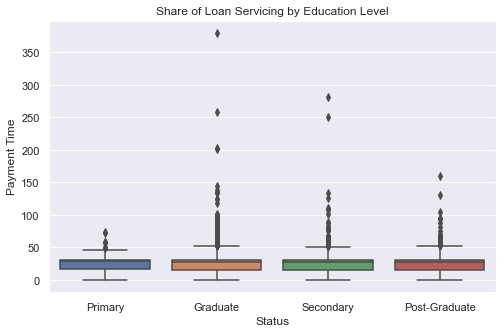

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='level_of_education_clients',
    y='final_paytime',
    data=drop_data)
plt.xlabel('Status')
plt.ylabel('Payment Time')
plt.title('Share of Loan Servicing by Education Level')
plt.show()

There are more returning cusotomers than first time customers

In [59]:
drop_data['first_time_returning'].value_counts()

Returning     18207
First-time     4341
Name: first_time_returning, dtype: int64

<a id='model'></a><br>
## 4. Model Building
[Back to Table of Contents](#Table_Contents)

### Encoding Data

In [60]:
#Re-assign data for model training
model_data = drop_data

#List of columns to be dropped
columns_drop = ['customerid', 'systemloanid', 'approveddate',
       'creationdate', 'birthdate', 'longitude_gps', 'latitude_gps',
       'closeddate', 'firstduedate', 'firstrepaiddate', 'target']

#Droping some feature variables and assigning the target variable
model_data1 = model_data.drop(columns_drop, axis = 1)
y = model_data['target']

In [93]:
#Instantiating label econder and standard scaler
encoder = LabelEncoder()
scaler = StandardScaler()

#Encoding the categorical variables
columns = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'first_time_returning']
for col in columns:
    model_data1[f'{col}_encode'] = encoder.fit_transform(model_data1[col])
    
#Re-assigning the features
X1 = model_data1.drop(columns, axis = 1)

#Applying Standard scaler to the feature variables and label encoder to the target variable
#X_scaled =  scaler.fit_transform(X)
y_encoded = encoder.fit_transform(y)


#Splitting the dataset into train and test set
X, x, y_train, y_test = train_test_split(X1, y_encoded, test_size=0.15, random_state=101)

X_train = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(x), columns=x.columns)

In [89]:
y_encoded.shape

(22548,)

# Model training with unbalanced data

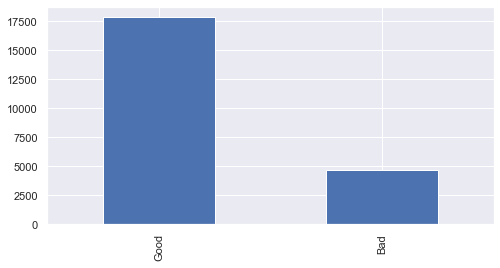

In [62]:
#Plotting the distribution of the target variable
plt.figure(figsize=(8, 4))
model_data['target'].value_counts().plot(kind='bar')
plt.show()

# Logistic Regression

In [63]:
#Instantiating logistic regression with 0 random state
lr = LogisticRegression(random_state=0)

#Training the modeal
lr.fit(X_train, y_train)

#Generating predictions from the trained model
y_pred = lr.predict(X_test) #Return the predictions                                                                                      

## Risk in first time VS repeat loans

Given that a borrower can apply for a loan for the first time or subsequent times, the probability of a borrower defaulting whether it is a first-time or subsequent loans, according to this study, is defined as follows:


Pr (G|F) =   "number of good loan | first-time loan" /"Total number of first-time loan"      …………………………………... (1)

Pr (G|R) =   "number of good loan | returning loan" /"Total number of returning loan"       ...………………………………... (2)

Pr (B|F) =   "number of bad loan | first-time loan" /"Total number of first-time loan"       …………………………………... (3)

Pr (B|R) =   "number of bad loan | returning loan" /"Total number of returning loan"       …………………………………... (4)


Where:
B = Bad loan
G = Good loan
F = First-time loan
R = Returning loan

The likelihood that a first-time and returning loan will be good or bad is determined using the aforementioned equations (1) through (4). The values of the probabilities are presented in the probability distribution of customer status for good and bad loan as displays below.


In [64]:
#Adding y_test and y_pred to the test dataset
x['actual'] = y_test
x['predictions'] = y_pred#.value_counts()


#Creating a dictionary for the columns to be added to the created data frame
pred_counts_returning = x[x['first_time_returning_encode'] == 1]['predictions'].value_counts()
actual_counts_returning = x[x['first_time_returning_encode'] == 1]['actual'].value_counts()

pred_counts_first = x[x['first_time_returning_encode'] == 0]['predictions'].value_counts()
actual_counts_first = x[x['first_time_returning_encode'] == 0]['actual'].value_counts()

no_of_first = len(x[x['first_time_returning_encode'] == 0])
no_of_returning = len(x[x['first_time_returning_encode'] == 1])

# dic = {
#     'Status': ['First time', 'Returning'],
# #     'Good': [pred_counts_first[1], pred_counts_returning[1]], 
# #     'Bad': [pred_counts_first[0], pred_counts_returning[0]],
#     'Prob_Good': [round(pred_counts_first[1]/no_of_first, 3), round(pred_counts_returning[1]/no_of_returning, 3)],
#     'Prob_Bad': [round(pred_counts_first[0]/no_of_first, 3), round(pred_counts_returning[0]/no_of_returning, 3)]
#         }

dic = {
    'Status': ['Prob_Good', 'Prob_Bad'],
#     'Good': [pred_counts_first[1], pred_counts_returning[1]], 
#     'Bad': [pred_counts_first[0], pred_counts_returning[0]],
    'First time': [round(pred_counts_first[1]/no_of_first, 3), round(pred_counts_first[0]/no_of_first, 3)],
    'Returning': [round(pred_counts_returning[1]/no_of_returning, 3), round(pred_counts_returning[0]/no_of_returning, 3)]
        }

#Creating a data frame containing store the predicted, actual and loan status of first time and returning customers
status_df = pd.DataFrame(dic)

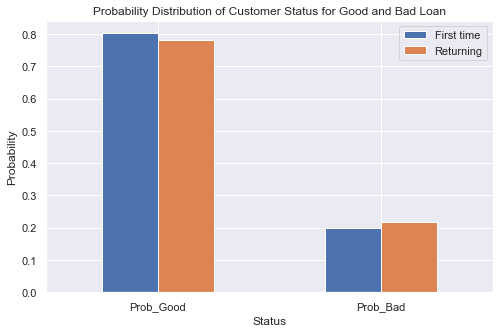

In [107]:
status_plot = status_df.set_index('Status')

status_plot.plot(kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.ylabel('Probability')
plt.title('Probability Distribution of Customer Status for Good and Bad Loan')
plt.show()

The distribution provides insight into the project question: 

**"Is the risk of loan default larger for first-time borrowers or repeat borrowers?"**

For context’s sake, a loan is said to be good when its servicing by the borrower occurs within the stipulated time given by the P2P platform. In this case, we can say the loan is “settled on time” while a loan is considered bad when the opposite scenarios happen. In this case, the loan was not settled loan on time. It is evident from the probabilities shown in the graph that borrowers at first-time loans are at a lower risk of defaulting on their loans than repeat borrowers are. This is because the likelihood that a loan will be good given that a it is a first-time loan is marginally higher than the likelihood that a loan will be good given that it is a repeat borrower. In a similar vein, the likelihood that a loan will default if the borrower is a first-time borrower is lower than the likelihood that the borrower would default if they are a recurring borrower. This outcome led us to reject the null hypothesis and accept the alternative hypothesis which states that the probability of a borrower defaulting when taking a first-time loan is lower than when he/she takes subsequent loans.

In [215]:
confusion_matrix(y_test, y_pred)

array([[ 723,    1],
       [   1, 2658]], dtype=int64)

In [66]:
#Regression Metrics
#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

#R2 Score
r2 = r2_score(y_test, y_pred)

f'Checking out the metrics: mae = {round(mae, 5)}, mse = {round(mse, 5)} and r2 = {round(r2, 3)}'

'Checking out the metrics: mae = 0.00059, mse = 0.00059 and r2 = 0.996'

In [67]:
from scipy import stats

## Key contributory factors

To answer the research question of what factors can influence the likelihood of defaulting in a P2P lending platform, the following hypothesis statement were stated using the threshold p-value of less than or equal to 0.05.

**Null hypothesis:** There are no statistically significant factors that contributes to increase a borrower’s likelihood of defaulting on P2P lending platforms in Nigeria

Acceptance and rejection of the hypothesis is based the p-value. A p-value less than or equal to 0.05 indicates that the null hypothesis will be rejected which alternatively means that the alternative hypothesis will be accepted. The vice-versa happens when the p-value is greater than the threshold of 0.05.

To test the hypothesis, the data was run through an OLS regression model using the stats model’s library. The target variable “Default or not default” was set against the all of the features and fitted to the model.

In [85]:
y_name = 'target'

X_name = list(X.columns)

formular = y_name + "~" + "+".join(X_name)
formular

'target~loannumber+loanamount+totaldue+termdays+interest+interest_rate+approved_year+approved_Month+approved_day+approved_hour+approved_minute+approved_second+creation_year+creation_Month+creation_day+creation_hour+creation_minute+creation_second+closed_year+closed_Month+closed_day+closed_hour+closed_minute+closed_second+firstdue_year+firstdue_Month+firstdue_day+firstdue_hour+firstdue_minute+firstdue_second+firstrepaid_year+firstrepaid_Month+firstrepaid_day+firstrepaid_hour+firstrepaid_minute+firstrepaid_second+response_time+proposed_paytime+first_paytime+final_paytime+age+bank_account_type_encode+bank_name_clients_encode+employment_status_clients_encode+level_of_education_clients_encode+first_time_returning_encode'

In [94]:
ols_data = X1

In [95]:
ols_data['target'] = y_encoded

In [96]:
ols_data.head()

,loannumber,loanamount,totaldue,termdays,interest,interest_rate,approved_year,approved_Month,approved_day,approved_hour,...,proposed_paytime,first_paytime,final_paytime,age,bank_account_type_encode,bank_name_clients_encode,employment_status_clients_encode,level_of_education_clients_encode,first_time_returning_encode,target
0,1.0,10000.0,11500.0,15.0,1500.0,3.65,2017,7,2,19,...,15.0,22.0,22.0,27,2,6,1,2,0,0
1,2.0,10000.0,11500.0,15.0,1500.0,3.65,2017,7,27,19,...,30.0,30.0,30.0,27,2,6,1,2,1,0
2,1.0,10000.0,13000.0,30.0,3000.0,3.65,2016,5,13,15,...,30.0,31.0,32.0,36,1,11,1,0,0,0
3,2.0,10000.0,13000.0,30.0,3000.0,3.65,2016,6,15,11,...,29.0,30.0,30.0,36,1,11,1,0,1,1
4,3.0,20000.0,24500.0,30.0,4500.0,2.74,2017,5,23,14,...,29.0,29.0,29.0,37,1,11,1,0,1,1


In [97]:
from statsmodels.formula.api import ols

In [98]:
model = ols(formula = formular, data = ols_data)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:56:36   Log-Likelihood:                -7617.2
No. Observations:               22548   AIC:                         1.532e+04
Df Residuals:                   22503   BIC:                         1.569e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

The summary table of the model is shown above. The table shows the coefficients of each of the features, the standard error from calculating the coefficients, the t-statistics, p-value as well as the confidence interval. From the output generated, the p-value for each of the features were evaluated and compared with the threshold p-value. The result shows that ‘number of loans taken’, ‘length of contract’, ‘interest rate’, ‘duration it takes to pay loan after the first due date’, ‘proposed time duration to make the first payment or instalment’, ‘time duration it took the borrower to finish paying the loan’ and ‘age of the borrower as at the time of loan application’. Hence, the stated features are contributory factors to determine loan default or not.

# LDA

In [103]:
#Fit the LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [104]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(lda_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8744928811509227


In [108]:
#predict which class the new observation belongs to
X_test_lda = X_test#.drop(['actual', 'predictions'], axis = 1)
y_pred_lda = lda_model.predict(X_test_lda)

In [213]:
print(classification_report(y_test, y_pred_lda, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      0.40      0.58       724
         Bad       0.86      1.00      0.93      2659

    accuracy                           0.87      3383
   macro avg       0.93      0.70      0.75      3383
weighted avg       0.89      0.87      0.85      3383



In [214]:
confusion_matrix(y_test, y_pred_lda)

array([[ 293,  431],
       [   0, 2659]], dtype=int64)

In [109]:
#LDA Metrics
#Mean Absolute Error
mae_lda = mean_absolute_error(y_test, y_pred_lda)

#Mean Squared Error
mse_lda = mean_squared_error(y_test, y_pred_lda)

#R2 Score
r2_lda = r2_score(y_test, y_pred_lda)

f'Checking out the metrics: mae = {round(mae_lda, 5)}, mse = {round(mse_lda, 5)} and r2 = {round(r2_lda, 3)}'

'Checking out the metrics: mae = 0.1274, mse = 0.1274 and r2 = 0.243'

In [110]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)

pred_clf = clf.predict(X_test_lda)

In [111]:
#RandomForestClassifier Metrics
#Mean Absolute Error
mae_clf = mean_absolute_error(y_test, pred_clf)

#Mean Squared Error
mse_clf = mean_squared_error(y_test, pred_clf)

#R2 Score
r2_clf = r2_score(y_test, pred_clf)

f'Checking out the metrics: mae = {round(mae_clf, 5)}, mse = {round(mse_clf, 5)} and r2 = {round(r2_clf, 3)}'

'Checking out the metrics: mae = 0.11587, mse = 0.11587 and r2 = 0.311'

In [112]:
from sklearn.metrics import classification_report

target_names = ['Good','Bad'] # target values

# Print classification report after a train/test split:
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       724
         Bad       1.00      1.00      1.00      2659

    accuracy                           1.00      3383
   macro avg       1.00      1.00      1.00      3383
weighted avg       1.00      1.00      1.00      3383



In [113]:
print(classification_report(y_test, pred_clf, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      0.46      0.63       724
         Bad       0.87      1.00      0.93      2659

    accuracy                           0.88      3383
   macro avg       0.94      0.73      0.78      3383
weighted avg       0.90      0.88      0.87      3383



In [212]:
confusion_matrix(y_test, pred_clf)

array([[ 332,  392],
       [   0, 2659]], dtype=int64)

# XGBoost

In [118]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [119]:
#pip install xgboost

In [124]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
# plot feature importance

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

To delve more in-depth into contributory factors that increase a borrower’s likelihood of defaulting on P2P lending platforms in Nigeria, the XGBoost feature importance class was explored. Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.
				
The figure below shows the order of importance from the highest to the lowest. From the plot, the feature with the most contribution to the target variable is the time duration it takes to pay off the loan, followed by the length of contract.


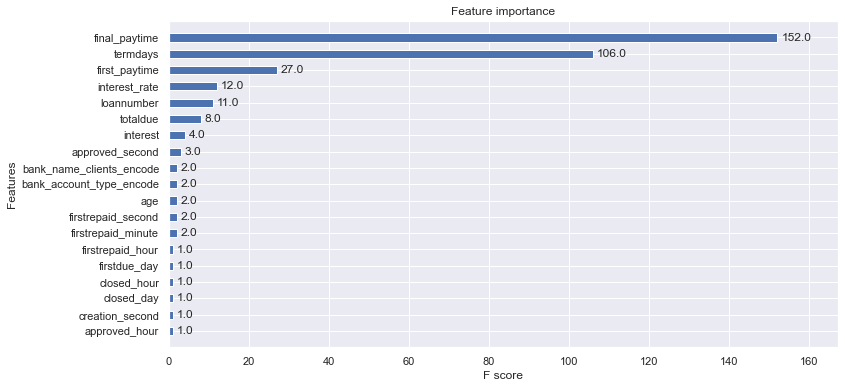

In [142]:
#plt.figure(figsize=(15,6))
plot_importance(xg_model, height=0.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.show()

In [143]:
pred_xgb = xg_model.predict(X_test)

In [144]:
print(classification_report(y_test, pred_xgb, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       724
         Bad       1.00      1.00      1.00      2659

    accuracy                           1.00      3383
   macro avg       1.00      1.00      1.00      3383
weighted avg       1.00      1.00      1.00      3383



In [211]:
confusion_matrix(y_test, pred_xgb)

array([[ 724,    0],
       [   0, 2659]], dtype=int64)

# LightGBM

In [148]:
import lightgbm as ltb

In [149]:
#pip install lightgbm

In [150]:
model_lgm = ltb.LGBMClassifier()

In [151]:
model_lgm.fit(X_train, y_train)

LGBMClassifier()

In [153]:
pred_lgm = model_lgm.predict(X_test)

In [154]:
print(classification_report(y_test, pred_lgm, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       724
         Bad       1.00      1.00      1.00      2659

    accuracy                           1.00      3383
   macro avg       1.00      1.00      1.00      3383
weighted avg       1.00      1.00      1.00      3383



In [155]:
confusion_matrix(y_test, pred_lgm)

array([[ 724,    0],
       [   1, 2658]], dtype=int64)

# Support Vector Machine

In [156]:
from sklearn import svm

In [157]:
model_svm = svm.SVC()

In [158]:
model_svm.fit(X_train, y_train)

SVC()

In [159]:
pred_svm = model_lgm.predict(X_test)

In [160]:
print(classification_report(y_test, pred_svm, target_names=target_names))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       724
         Bad       1.00      1.00      1.00      2659

    accuracy                           1.00      3383
   macro avg       1.00      1.00      1.00      3383
weighted avg       1.00      1.00      1.00      3383



<a id='evaluate'></a><br>
## 5. Model Evaluation
[Back to Table of Contents](#Table_Contents)

To further evaluate the error made by our choice ML model, the Root Mean Squared error was looked into. A common metric for determining how accurately a model predicts quantitative data is the Root Mean Square Error (RMSE). RMSE is defined as the square root of the mean of the square of all errors. Mathematically, it is represented as:

RMSE=√(∑_(i = 1)^n▒〖(y ̂_i-y_i )^2/n  〗)

where y_i are the observations, y ̂ represent the predicted values of a variable, and n the number of observations available for analysis. As a prominent statistic used to test a model's inaccuracy in making predictions, it reveals the model's absolute fit to the data. Additionally, it offers the average model prediction error in units of the relevant variable. Lower values are preferable because RMSE scores are negatively oriented.

For our study, the RMSE score for the train and test set was calculated and the results are shown in the chart below:


In [163]:
def test_model(model, x, y):
    # your code here
    y_pred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y_pred, y))
    return rmse

In [169]:
models = [lr, lda_model, clf, xg_model, model_lgm, model_svm]

In [173]:
eval_train = [test_model(model, X_train, y_train) for model in models]

In [174]:
eval_train

[0.03148635507168932,
 0.35306418363629344,
 0.3421056328430716,
 0.0,
 0.0,
 0.20972942951079135]

In [175]:
eval_test = [test_model(model, X_test, y_test) for model in models]

In [176]:
eval_test

[0.024314424738609272,
 0.35693376760209455,
 0.3404019463405298,
 0.0,
 0.017192894613320565,
 0.23946931178303613]

In [208]:
eval_df = pd.DataFrame({
            'Model': ['Logistic R', 'LDA', 'Random Forest', 'XGBoost', 'LightGBM', 'SVM'],
            'Train_RMSE' : eval_train,
             'Test_RMSE': eval_test}).set_index('Model')

In [209]:
eval_df

,Train_RMSE,Test_RMSE
Model,,
Logistic R,0.031486,0.024314
LDA,0.353064,0.356934
Random Forest,0.342106,0.340402
XGBoost,0.000000,0.000000
LightGBM,0.000000,0.017193
SVM,0.209729,0.239469


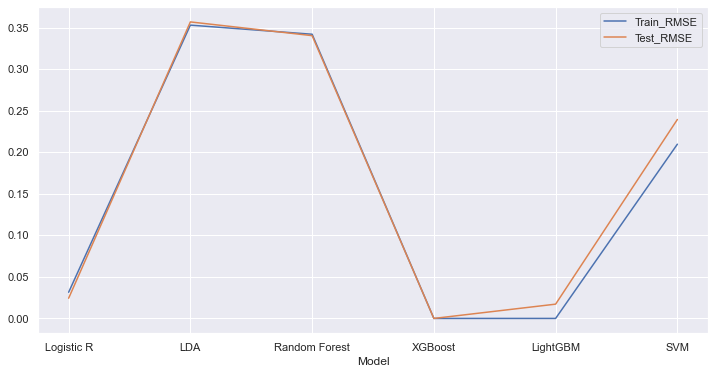

In [217]:
eval_df.plot()
plt.xticks = models

Our results revealed that the XGBoost classifier performed better, with the train and test RMSE scores at 0. This indicate that the model is able to accurately predict if a loan is good or bad. The Logistic Regression and LightGBM model had rather low train and test RMSE scores as seen in the graph. However, the Logistic regression model has a smaller error rate between the train and test set compared to the LightGBM model making it a more preferred model.

On the other hand, compared to its counterpart models, the LDA and Random Forest models had the worst-performance with relatively high RMSE scores for both the train and test sets. The SVM is the model that had the highest error rate between the train and test set when compared to other models. Even though it has an accuracy of 1.0, this wide margin indicates that there was overfitting meaning the model might not be able to correctly classify the outcome variable correctly when exposed to unseen data. 


<a id='conclude'></a><br>
## 6. Conclusion
[Back to Table of Contents](#Table_Contents)

The study reveals that ‘number of loans taken’, ‘length of contract’, ‘interest rate’, ‘duration it takes to pay loan after the first due date’, ‘proposed time duration to make the first payment or instalment’, ‘time duration it took the borrower to finish paying the loan’ and ‘age of the borrower as at the time of loan application’ are all contributory factors that influences the default rate of borrowers in a P2P setting. Findings from the research also revealed that the probability of a borrower defaulting when taking a first-time loan is lower than when he/she takes subsequent loans Also, the XGBoost classification model will be the model of interest for this study given that it does well in predicting our target variables with high accuracy and very minimal errors. 

<a id='recommend'></a><br>
## 7. Recommendation
[Back to Table of Contents](#Table_Contents)

Having broadly discussed the P2P lending and the adoption of AI models in reducing the credit risk, the following recommendations are hereby proffered;

1.	The P2P lending platforms in the country should always be ready to adopt hybrid models that contains a combination of the best performing models used on the data for minimizing the credit risk. In order to avoid loan defaults by the borrowers either due to delay in payment or the lack of payment, there is a need for FinTech institutions in the country to stay updated. These platforms should be willing to learn from countries that have adopted the P2P lending where the marketplace is huge and prospers with little or no hitches. Examples of some of these countries are the UK and the US where P2P lending has expanded to some certain level. Learning from them and adopting their techniques can go a long way in minimizing credit risk.

2.	Another method which can be helpful in reducing this risk after the adoption of AI models is to have an effective regulatory framework for P2P lending in the country. Where there are regulatory frameworks which holds the borrowers accountable in cases of default, then risk is minimized to some certain extent. The regulatory framework will assist AI models in minimising this risk.

3.	Since these P2P lending platforms are the ones in charge of using AI models to determine the worthiness of the borrowers, then they should in all cases serve as advisors to investors and lenders. The investors should be provided with all necessary information of the borrowers in order to determine whether or not a borrower is worthy of the investment. This strategy would as a matter of fact work better where these platforms are given the full capacity to make the decisions on who is appropriate or not.


<a id='reference'></a><br>
## 8. Reference
[Back to Table of Contents](#Table_Contents)

Odegua, R. (2020) Predicting bank loan default with extreme gradient boosting. arXiv preprint arXiv:2002.02011.